# Study of the patterns that determine the success of the game

Historical data on game sales, user and expert ratings, genres and platforms (for example, Xbox or PlayStation) are available from open sources. It is necessary to identify patterns that determine the success of the game. This research will allow you to bet on a potentially popular product and plan advertising campaigns.

**Research objectives:**
1. Identify interesting features and dependencies that exist in the video game market.
2. Determine which metrics have the greatest impact on the success of games.
**Thus, my research will take place in 10 stages:**
- Data overview.
- Data preprocessing.
- Calculation and addition of results to the table.
- Counting the number of games for different years.
- Analysis of sales changes by platform.
- Analysis of the impact of user reviews and critics on sales within one popular platform.
- Identification of the most profitable genres.
- Drawing up a portrait of the user of each region.
- Hypothesis testing. 
- General conclusion.

### Data overview. 

Import the libraries needed for research and disable the "warning of confusing assignments"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings

pd.options.mode.chained_assignment = None

In [2]:
data = pd.read_csv('datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Data preprocessing. 

Reduce the column names to lowercase.

In [3]:
data = (
    data.rename(columns={'Name':'name',
                        'Platform':'platform',
                        'Year_of_Release':'year_of_release',
                        'Genre':'genre',
                        'NA_sales':'na_sales',
                        'EU_sales':'eu_sales',
                        'JP_sales':'jp_sales',
                        'Other_sales':'other_sales',
                        'Critic_Score':'critic_score',
                        'User_Score':'user_score',
                        "Rating":'rating'})
)
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Convert the data into the desired types.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['critic_score'] = data['critic_score'].astype('Int64')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


The data type in the following columns has been changed:
- Year of release (float64 -> Int64), since the year is an integer.
- Critical score (float64 -> Int64), since the average critic score is an integer from 0 to 100.
- User score (object -> float64), since the average user score is a floating-point number from 0 to 10.

Process the gaps in the table.

In [6]:
pd.DataFrame(round(data.isna().mean() * 100)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,55.000000


In [7]:
years_of_life = data.pivot_table(index='platform',values='year_of_release',aggfunc=['min','max'])
years_of_life.columns=['min','max']
years_of_life['years_of_life']=years_of_life['max']-years_of_life['min']
years_of_life

,min,max,years_of_life
platform,,,
2600,1980,1989,9
3DO,1994,1995,1
3DS,2011,2016,5
DC,1998,2008,10
DS,1985,2013,28
GB,1988,2001,13
GBA,2000,2007,7
GC,2001,2007,6
GEN,1990,1994,4


In [8]:
data = data.dropna(subset=['year_of_release'])
data.head()
data['rating'] = data['rating'].fillna('tbd')
pd.DataFrame(round(data.isna().mean() * 100)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,55.000000


In [9]:
years_of_life = data.pivot_table(index='platform',values='year_of_release',aggfunc=['min','max'])
years_of_life.columns=['min','max']
years_of_life['years_of_life']=years_of_life['max']-years_of_life['min']
years_of_life

years_of_life.sort_values(by = 'years_of_life', ascending = False)

,min,max,years_of_life
platform,,,
PC,1985,2016,31
DS,1985,2013,28
GB,1988,2001,13
X360,2005,2016,11
PSP,2004,2015,11
PS2,2000,2011,11
NES,1983,1994,11
DC,1998,2008,10
Wii,2006,2016,10


The omissions in the year_of_release and ratings columns were replaced with the median in the first case, and the assignment of 'tbd' in the second.

The values of 'tbd' were also found in the user_score column, which means "to be determined", but since we used the to_numeric method with the errors='coerce' parameter, these values were converted to nan for convenience of further work with the data.

The omissions in the columns critic_score and user_score will be advisable to leave in the form in which they are now, since due to the fact that we have more than 50% of the omissions, we can neither replace them with median values, nor discard them.

The very appearance of such a number of omissions is probably due to either incorrect binding of ratings by data engineers, or a large number of indie games in the table that review aggregators simply do not track.

Let's calculate the total sales in all regions and write them in a separate column.

In [10]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,tbd,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,tbd,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,tbd,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,tbd,28.31


In [11]:
data.info()
data = data.dropna(subset=['name', 'genre'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           16446 non-null  object 
 11  total_sales      16446 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.7+ MB


### Research data analysis. 

Let's see how many games were released in different years.

In [12]:
games_per_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
games_per_year

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


As can be seen in the table above, games began to be released rapidly since 1995, more than 200 pieces per year, the industry overcame the mark of more than a thousand games per year in 2006, and the peak of video game release was in 2008-2009. Such rapid growth can be explained by the release of the super-successful sixth-generation PlayStation 2 console in 2000 (more than 150 million consoles were sold).

Let's analyze the changes in sales by platform.

Create a pivot_platform function that will return us pivot tables for the platforms we need

In [13]:
def pivot_platform(platform):
    target_pivot = (
        data
        .query('platform == @platform')
        .pivot_table(index='year_of_release',
                    values='total_sales',
                     aggfunc='sum'
                    )
    )
    return target_pivot

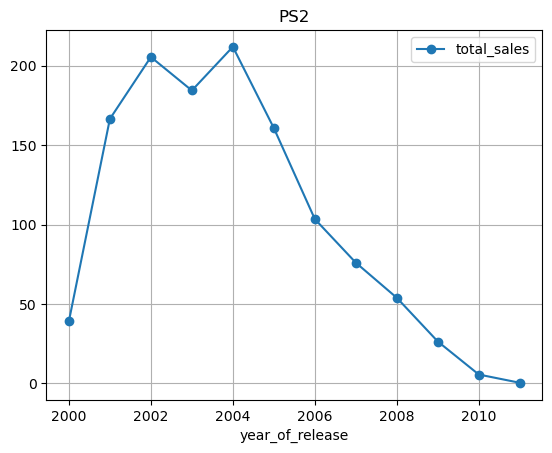

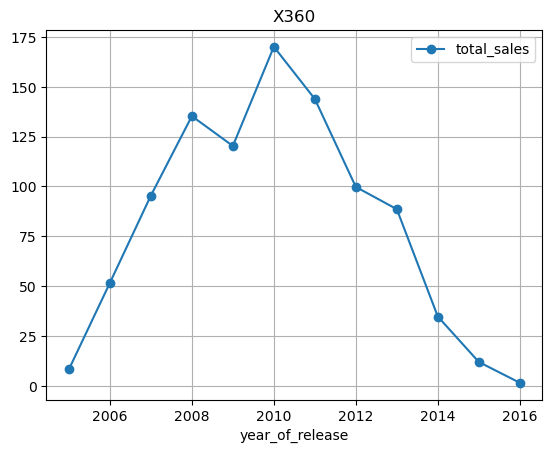

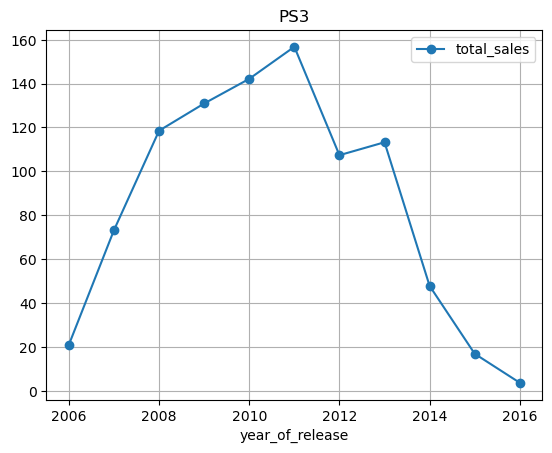

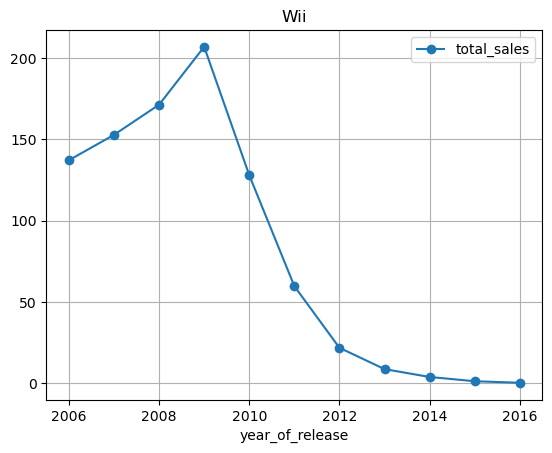

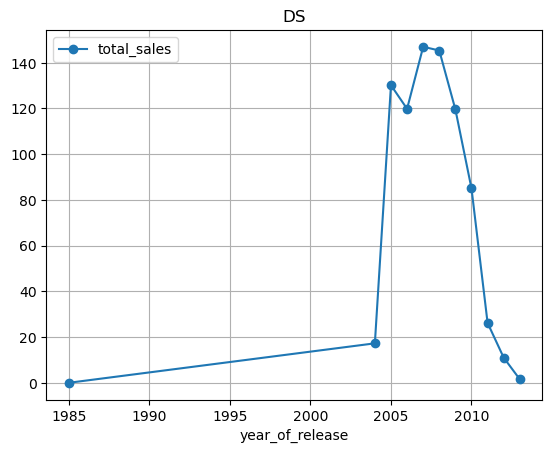

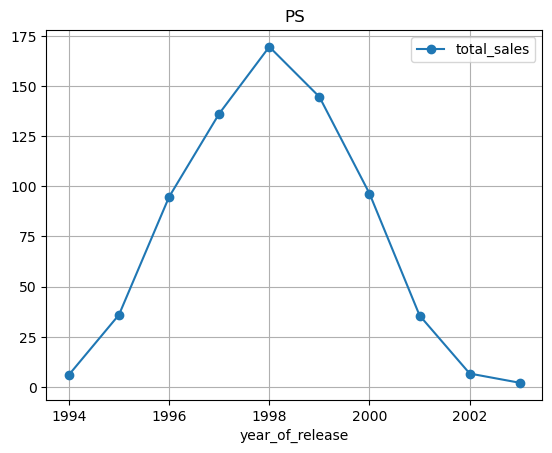

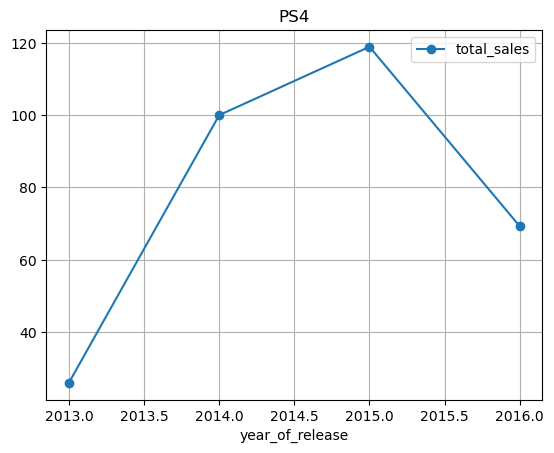

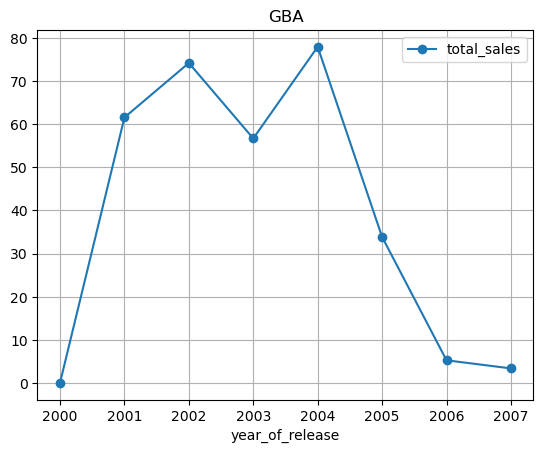

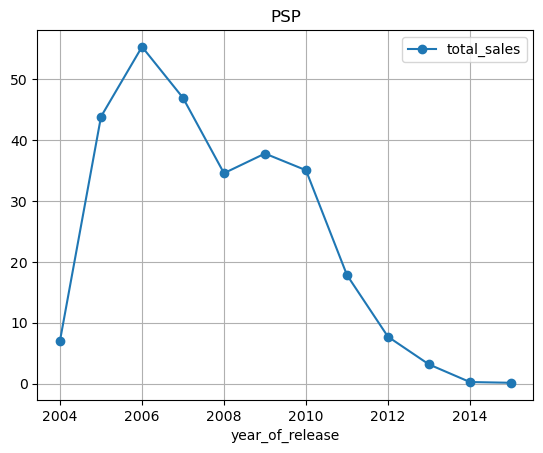

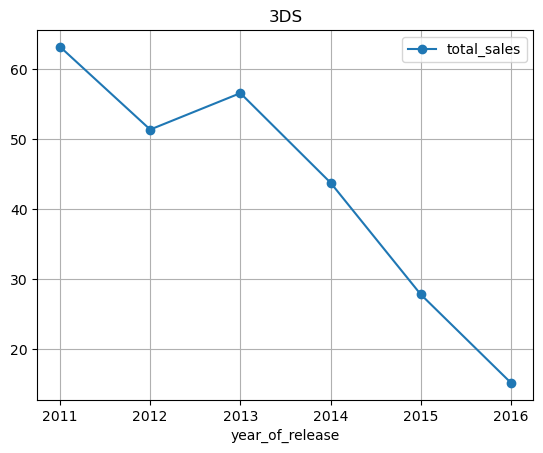

In [14]:
platforms_per_year = (
    data
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
)


for platform in platforms_per_year.index[:10]:
    (
        pivot_platform(platform)
        .plot(
            grid=True,
            style='o-',
        )
    )
    plt.title(platform)
    plt.show()

In [15]:
mean_years_of_life = round(years_of_life['years_of_life'].mean())
print(f'The average lifetime of the platforms is {mean_years_of_life} years')

The average lifetime of the platforms is 8 years


As can be seen in the graphs above, not all of the most successful game sales platforms are relevant for 2016, it should also be noted that on average the relevance of the platform is about 8 years.

Since game development is a dynamically changing industry, let's take the last 3 years for the current period, that is, from 2014 to 2016.

In [16]:
years_of_life['years_of_life']

platform
2600     9
3DO      1
3DS      5
DC      10
DS      28
GB      13
GBA      7
GC       6
GEN      4
GG       0
N64      6
NES     11
NG       3
PC      31
PCFX     0
PS       9
PS2     11
PS3     10
PS4      3
PSP     11
PSV      5
SAT      5
SCD      1
SNES     9
TG16     0
WS       2
Wii     10
WiiU     4
X360    11
XB       8
XOne     3
Name: years_of_life, dtype: Int64

In [17]:
actual_data = data.query('year_of_release >= 2014')
actual_data.shape

(1689, 12)

Let's choose potentially profitable platforms.

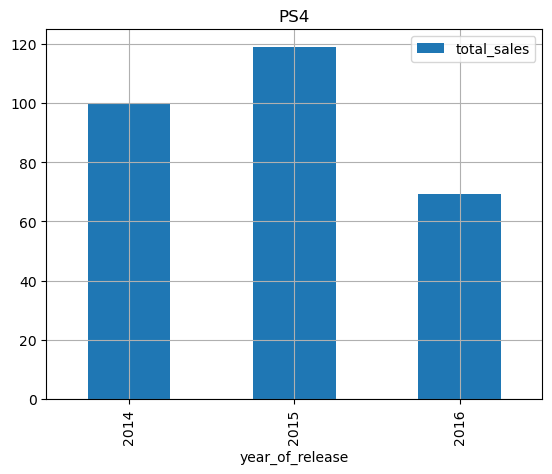

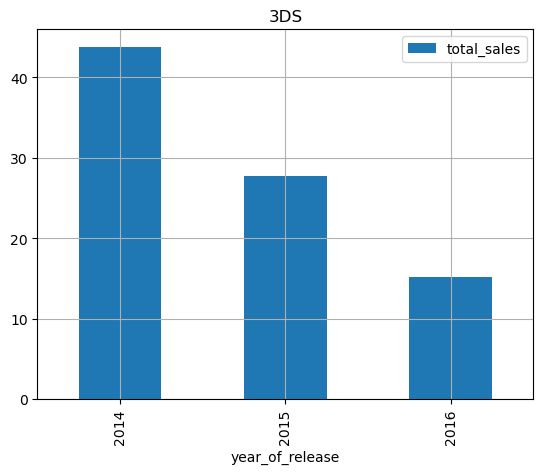

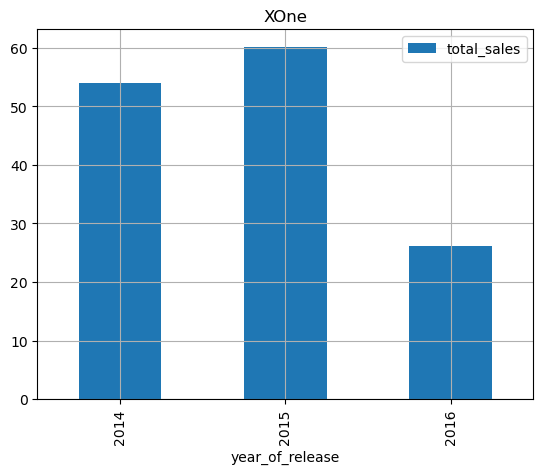

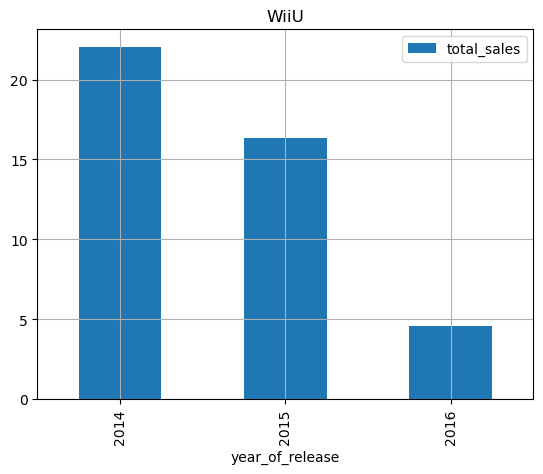

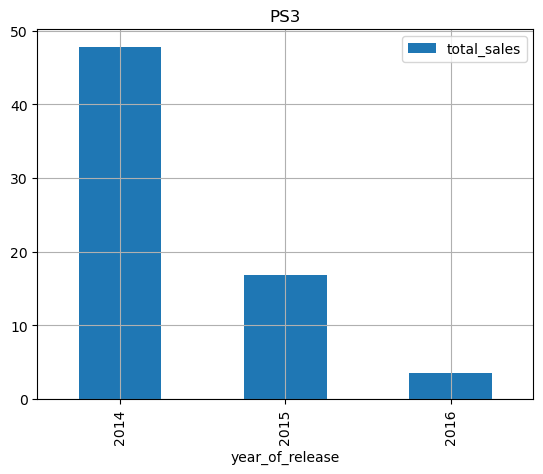

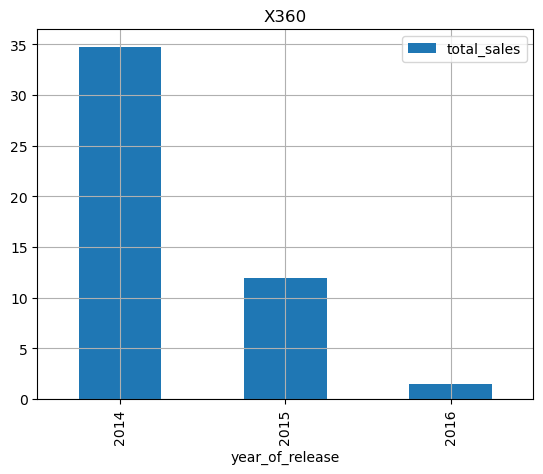

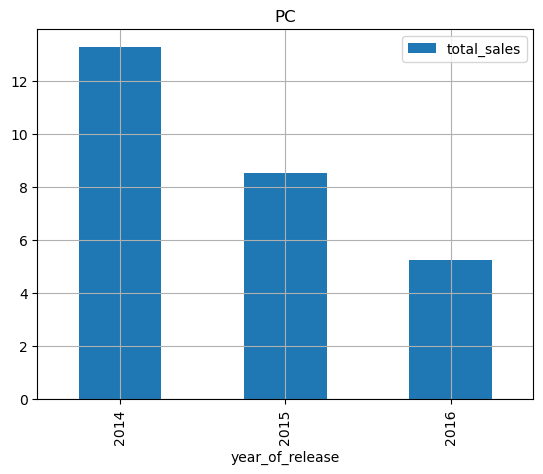

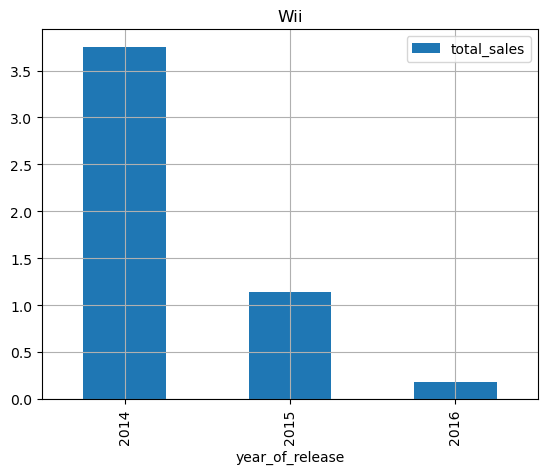

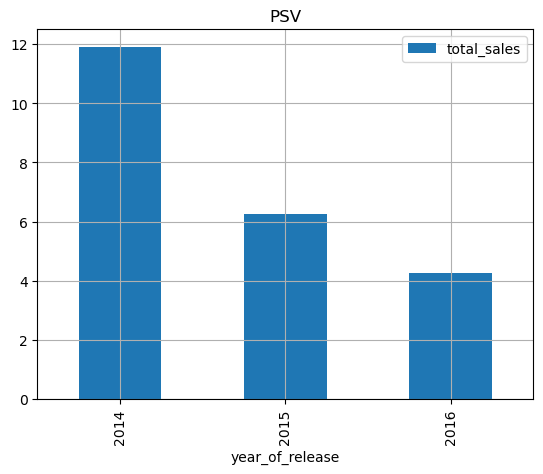

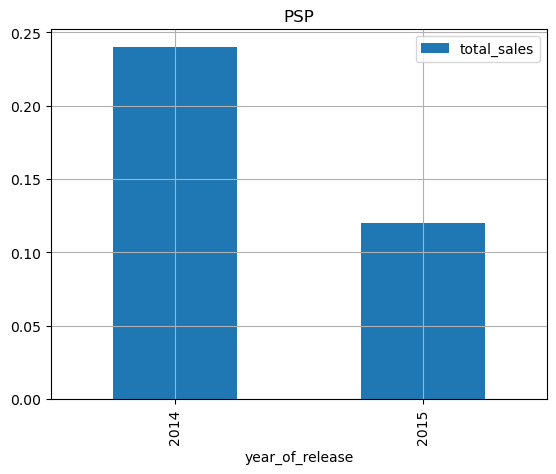

In [18]:
for platform in actual_data['platform'].unique():
    (
        actual_data
        .query('platform == @platform')
        .pivot_table(index='year_of_release',
                    values='total_sales',
                    aggfunc='sum')
        .plot(kind='bar',
            grid=True,
            style='o-',
        )
    )
    plt.title(platform)
    plt.show()

The following conclusions can be drawn from the graphs above:

- After 2013, with the release of the 8th generation consoles (PS4, XOne), sales on the consoles of the previous generation declined sharply.

- Considering that the data for 2016 is incomplete, the 8th generation consoles show sales growth in 2015.

The PS4, XOne, 3DS and PC platforms can be identified as potentially profitable, since the PS3 and X360 platforms had almost 0 game sales by 2016, because these consoles are considered obsolete, and the PC platform, although it has always lost to consoles in total video game sales, is the most common platform.

Let's build a boxplot for global sales broken down by platform and process abnormal values.

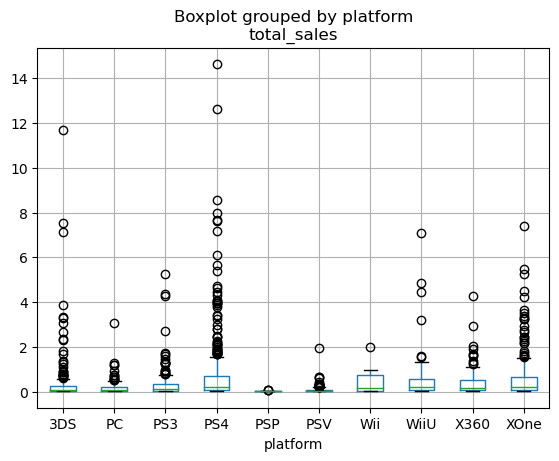

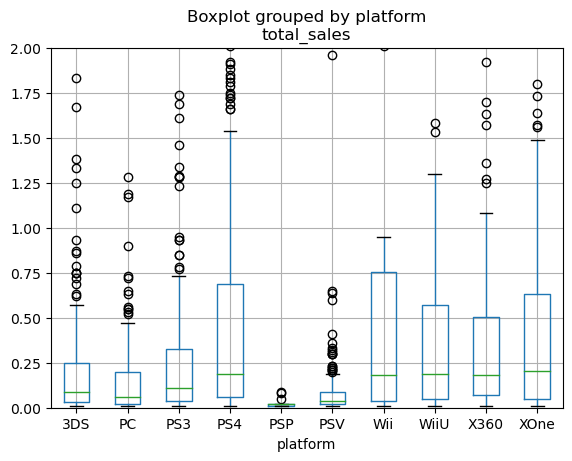

In [19]:
(
    actual_data
    .boxplot(
        column=['total_sales'],
        by='platform'
    )
)
plt.show()

(
    actual_data
    .boxplot(
        column=['total_sales'],
        by='platform'
    )
)
plt.ylim(0, 2)
plt.show()

As can be seen from the graphs, there is a considerable amount of potential emissions in the data, which is why the statistics may be distorted.

Let's see how the reviews of users and critics affect the sales of games, using the example of sales of competing platforms PS4, XBox One and PC.

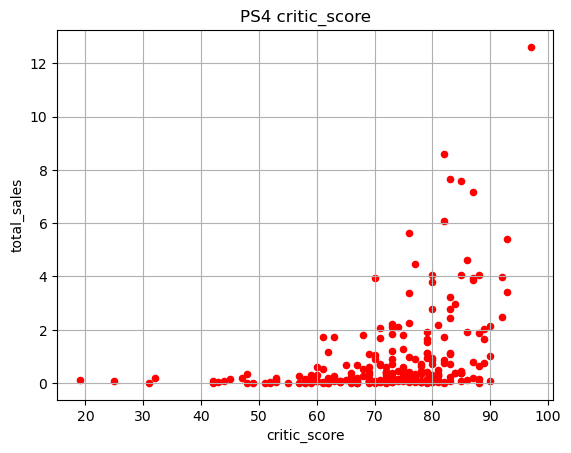

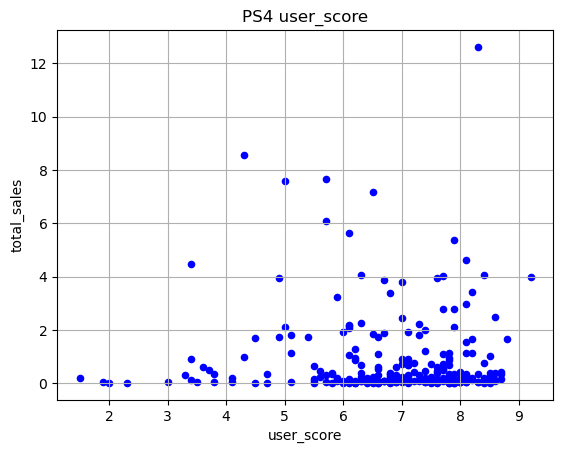

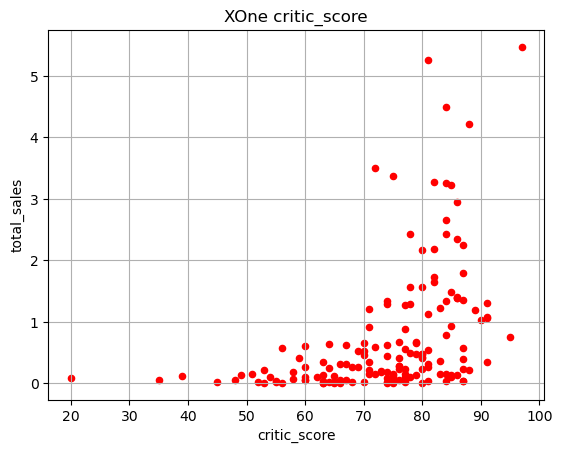

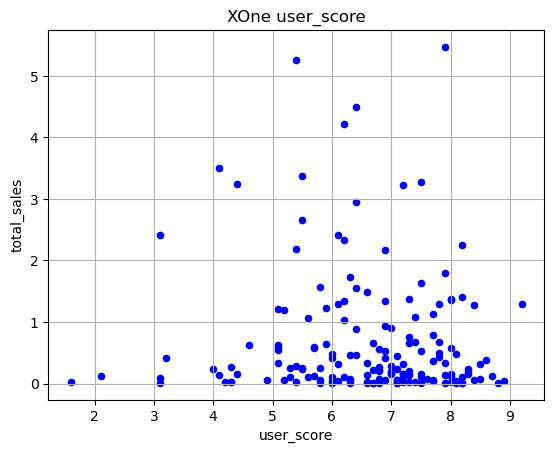

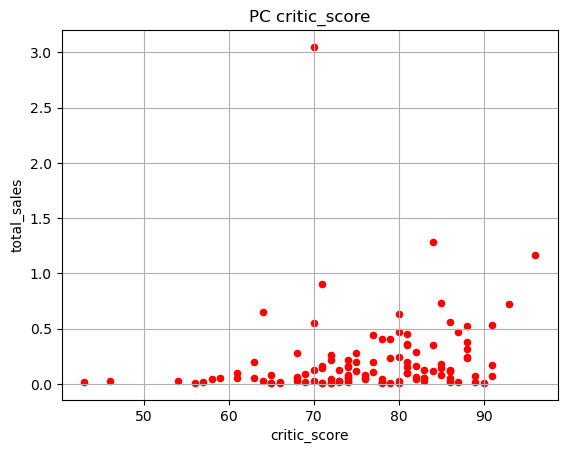

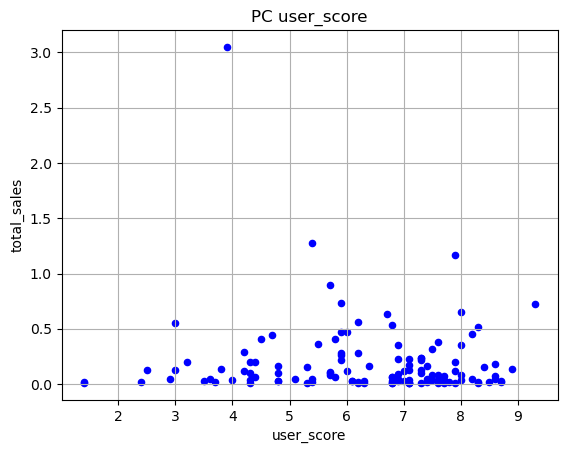

In [20]:
platforms = ['PS4', 'XOne', 'PC']
for platform in platforms:
    (
        actual_data
        .query('platform == @platform')
        .plot(x='critic_score',
             y='total_sales',
             kind='scatter',
             grid=True,
             color='red')
    )
    plt.title(platform + ' critic_score')
    plt.show()
    (
        actual_data
        .query('platform == @platform')
        .plot(x='user_score',
             y='total_sales',
             kind='scatter',
             grid=True,
             color='blue')
    )
    plt.title(platform + ' user_score')
    plt.show()

In [21]:
for platform in platforms:
    critic_score_corr = (
        actual_data
        .query('platform == @platform')
        .corr()
        ['total_sales']['critic_score']
    )
    print(f'Correlation between critics" ratings and total sales on the platform {platform} is: {critic_score_corr:.2f}\n')
    
    user_score_corr = (
        actual_data
        .query('platform == @platform')
        .corr()
        ['user_score']['total_sales']
    )
    print(f'Correlation between user ratings and total sales on the platform {platform} is: {user_score_corr:.2f}\n')


Correlation between critics" ratings and total sales on the platform PS4 is: 0.40

Correlation between user ratings and total sales on the platform PS4 is: -0.04

Correlation between critics" ratings and total sales on the platform XOne is: 0.43

Correlation between user ratings and total sales on the platform XOne is: -0.07

Correlation between critics" ratings and total sales on the platform PC is: 0.17

Correlation between user ratings and total sales on the platform PC is: -0.07



/var/folders/4f/f3dd0ncx24gcgzrw3shqgs_00000gn/T/ipykernel_25369/1627202562.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  actual_data
/var/folders/4f/f3dd0ncx24gcgzrw3shqgs_00000gn/T/ipykernel_25369/1627202562.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  actual_data


As can be seen from the conclusion above, critics' ratings have a moderate positive correlation with total sales on the PS4 and XOne platforms (Pearson's correlation coefficient is 0.4 and 0.43, respectively), while user ratings have virtually no effect on total sales (Pearson's correlation coefficient is -0.04 and -0.07, respectively). 

At the same time, critics' ratings on the PC platform have a much lower positive correlation (Pearson correlation coefficient is 0.17), but user ratings still do not affect total sales (Pearson correlation coefficient -0.07).

Such a low impact of user ratings is probably due to the fact that marketers of large game development studios have learned to work with "hate raids" from users, an example is the game The Last of Us 2: having a user rating of 3.3 and a critics rating of 95, the game still sold more than 10 million copies and became the most popular the best-selling exclusive for PS4.

Let's look at the general distribution of games by genre.

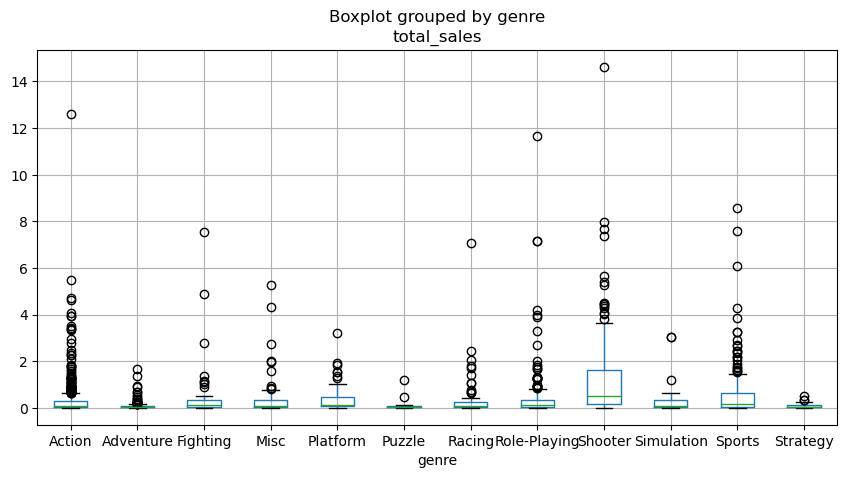

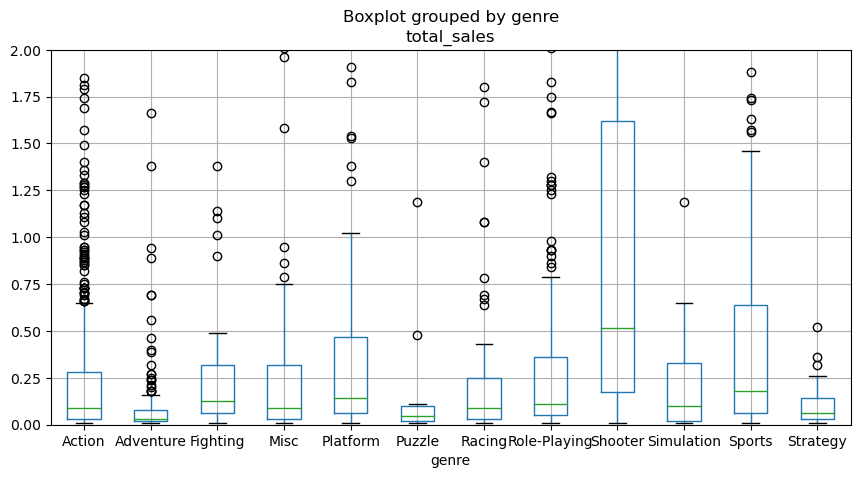

In [22]:
(
    actual_data
    .boxplot(
        column=['total_sales'],
        by='genre',
        figsize=(10, 5)
    )
)
plt.show()

(
    actual_data
    .boxplot(
        column=['total_sales'],
        by='genre',
        figsize=(10, 5)
    )
)
plt.ylim(0, 2)
plt.show()

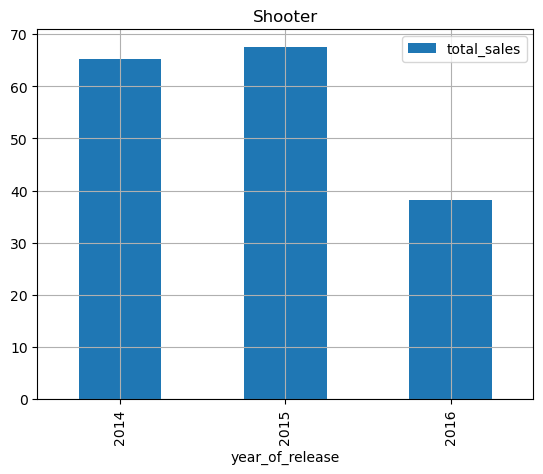

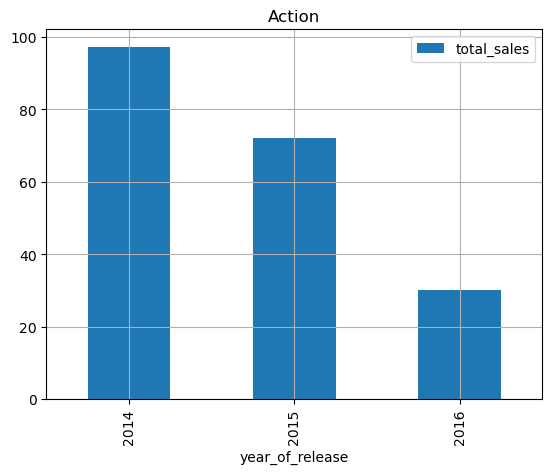

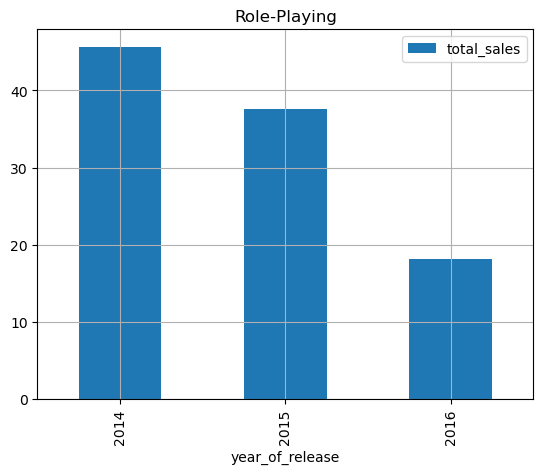

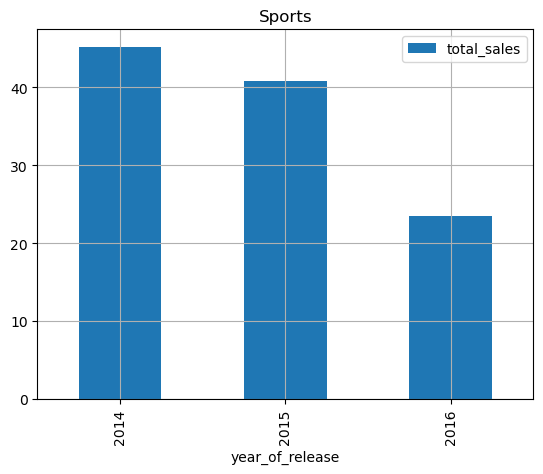

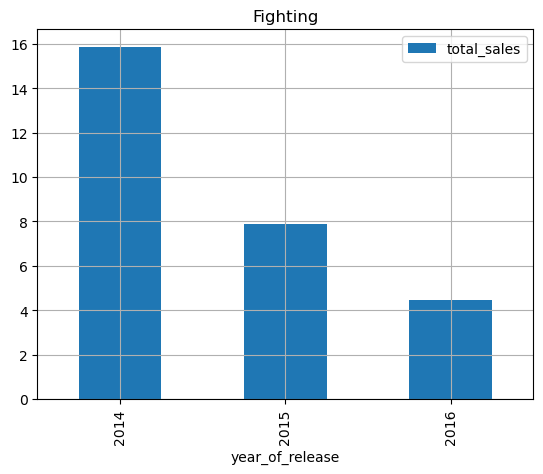

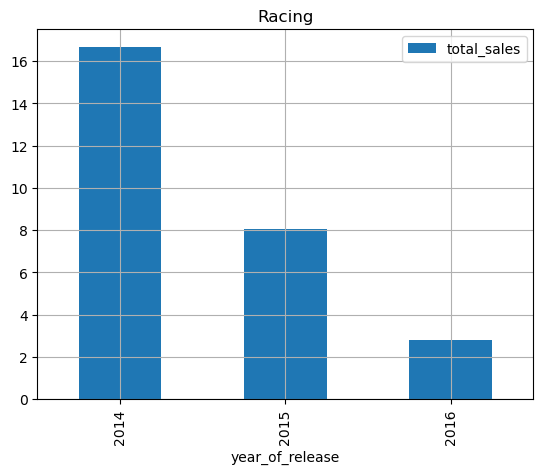

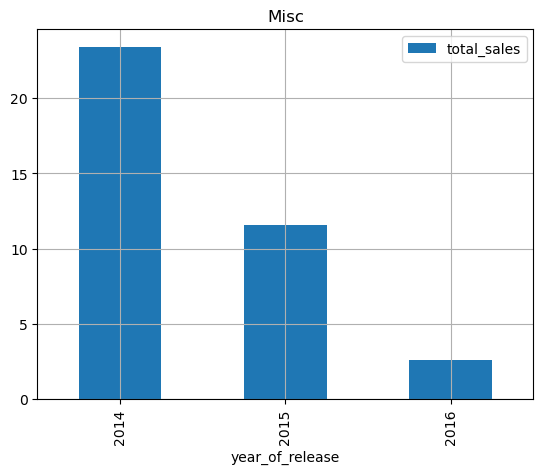

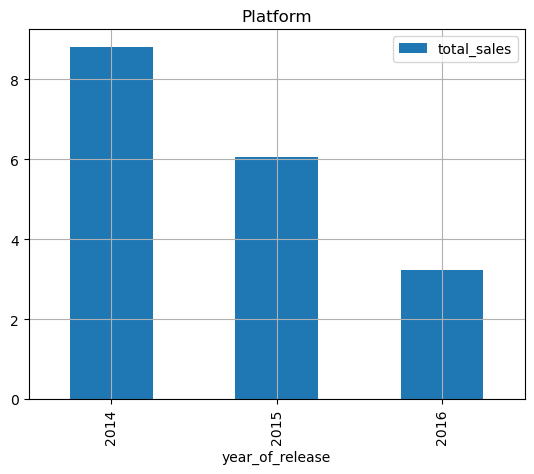

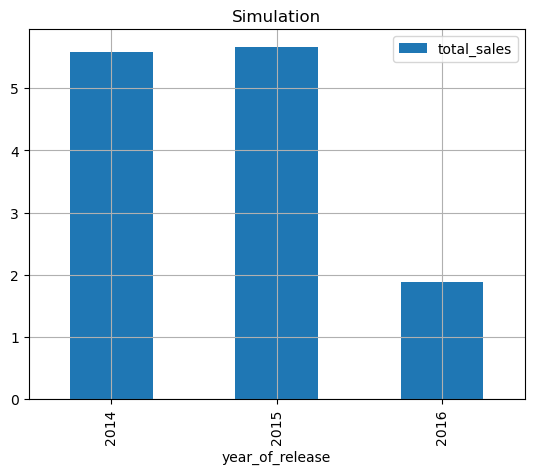

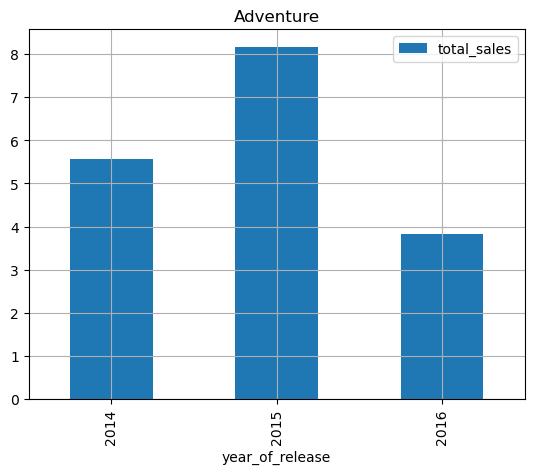

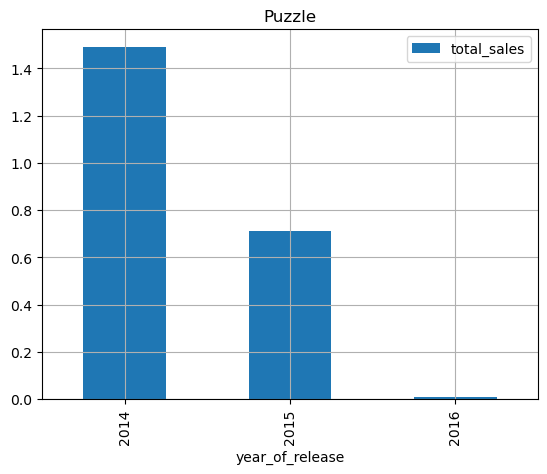

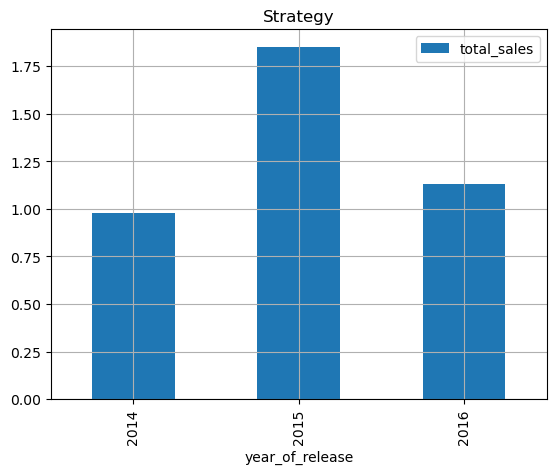

In [23]:
for genre in actual_data['genre'].unique():
    (
        actual_data
        .query('genre == @genre')
        .pivot_table(index='year_of_release',
                    values='total_sales',
                    aggfunc='sum')
        .plot(kind='bar',
             grid=True)
    )
    plt.title(genre)
    plt.show()

As can be seen from the scope diagram, the most consistently selling genres are Shooter (median sales of more than 500 thousand copies), Sports (median sales of more than 150 thousand copies), Platform(median sales of more than 125 thousand copies).

The best-selling genres for the current period are Action, Shooter, Sports and RolePlay, of which Actyon, Sports and Role-Play have a negative trend of total sales growth in recent years.

You should also pay attention to the growing total sales of genres such as Strategy (+75% in 2015) and Adventure (+40% in 2015).

The rest of the genres have low total and median sales values, and the Puzzle genre with the lowest sales among all genres also stands out.

### Portrait of the user of each region. 

#### The most popular platforms.

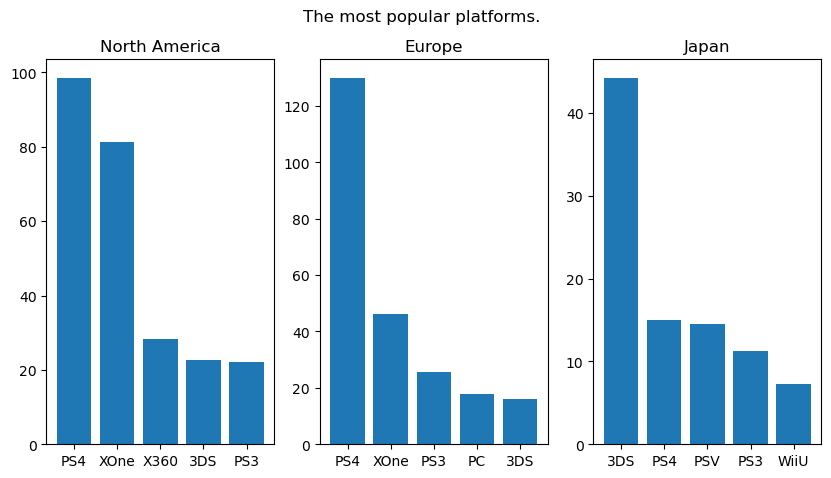

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
na_platforms = (
    actual_data
    .pivot_table(index='platform',
                values='na_sales',
                aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)[:5]
)
eu_platforms = (
    actual_data
    .pivot_table(index='platform',
                values='eu_sales',
                aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)[:5]
)
jp_platforms = (
    actual_data
    .pivot_table(index='platform',
                values='jp_sales',
                aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)[:5]
)
ax1.bar(na_platforms.index, na_platforms['na_sales'])
ax1.set_title('North America')
ax2.bar(eu_platforms.index, eu_platforms['eu_sales'])
ax2.set_title('Europe')
ax3.bar(jp_platforms.index, jp_platforms['jp_sales'])
ax3.set_title('Japan')
fig.suptitle('The most popular platforms.')
plt.show()

**The most popular platforms in the North American region:**
- PS4
- XOne
- X360
- 3DS
- PS3

**The most popular platforms in the European region:**
- PS4
- XOne
- PS3
- PC
- 3DS

**The most popular platforms in the Japanese region:**
- 3DS
- PS4
- PSV
- PS3
- WiiU

#### The most popular genres.

/var/folders/4f/f3dd0ncx24gcgzrw3shqgs_00000gn/T/ipykernel_25369/1810541190.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  na_platforms = na_platforms[:5].append(na_other)
/var/folders/4f/f3dd0ncx24gcgzrw3shqgs_00000gn/T/ipykernel_25369/1810541190.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eu_platforms = eu_platforms[:5].append(eu_other)
/var/folders/4f/f3dd0ncx24gcgzrw3shqgs_00000gn/T/ipykernel_25369/1810541190.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jp_platforms = jp_platforms[:5].append(jp_other)


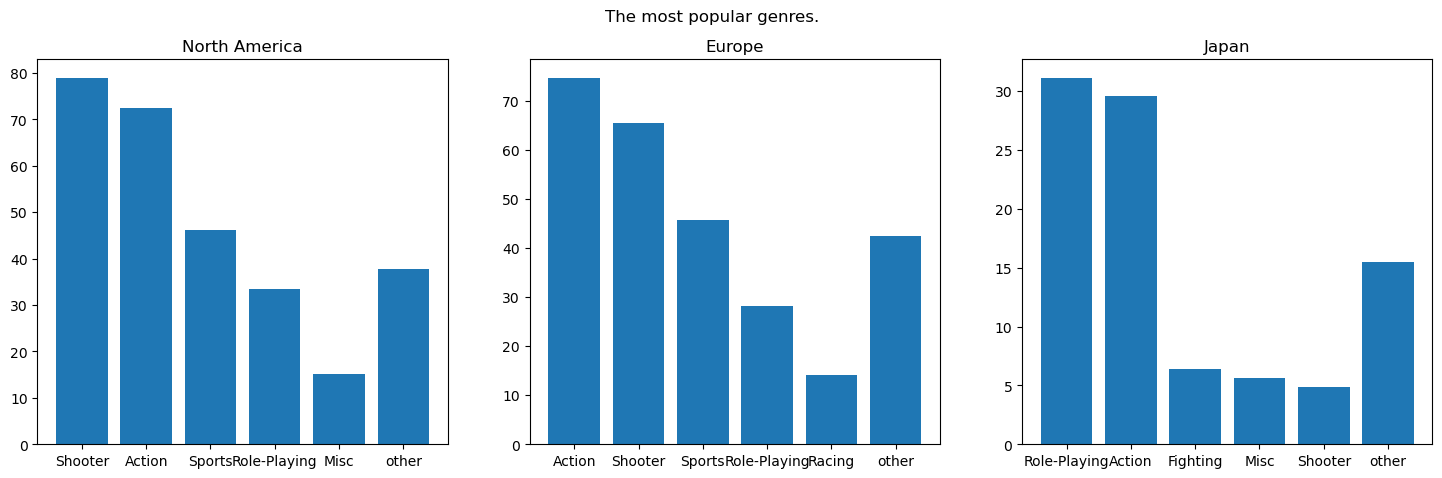

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
na_platforms = (
    actual_data
    .pivot_table(index='genre',
                values='na_sales',
                aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
)
na_other = pd.DataFrame([na_platforms['na_sales'][5:].sum()], columns=['na_sales'], index=['other'])
na_platforms = na_platforms[:5].append(na_other)

eu_platforms = (
    actual_data
    .pivot_table(index='genre',
                values='eu_sales',
                aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
)
eu_other = pd.DataFrame([eu_platforms['eu_sales'][5:].sum()], columns=['eu_sales'], index=['other'])
eu_platforms = eu_platforms[:5].append(eu_other)

jp_platforms = (
    actual_data
    .pivot_table(index='genre',
                values='jp_sales',
                aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
)
jp_other = pd.DataFrame([jp_platforms['jp_sales'][5:].sum()], columns=['jp_sales'], index=['other'])
jp_platforms = jp_platforms[:5].append(jp_other)

ax1.bar(na_platforms.index, na_platforms['na_sales'])
ax1.set_title('North America')
ax2.bar(eu_platforms.index, eu_platforms['eu_sales'])
ax2.set_title('Europe')
ax3.bar(jp_platforms.index, jp_platforms['jp_sales'])
ax3.set_title('Japan')
fig.suptitle('The most popular genres.')
plt.show()

****The most popular genres in the North American region:**
- Shooter
- Action
- Sports
- Role-Playing
- Misc

**The most popular genres in the European region:**
- Action
- Shooter
- Sports
- Role-Playing
- Racing

****The most popular genres in the Japanese region:**
- Role-Playing
- Action
- Fighting
- Misc
- Shooter

#### The impact of ESRB on sales in the region.

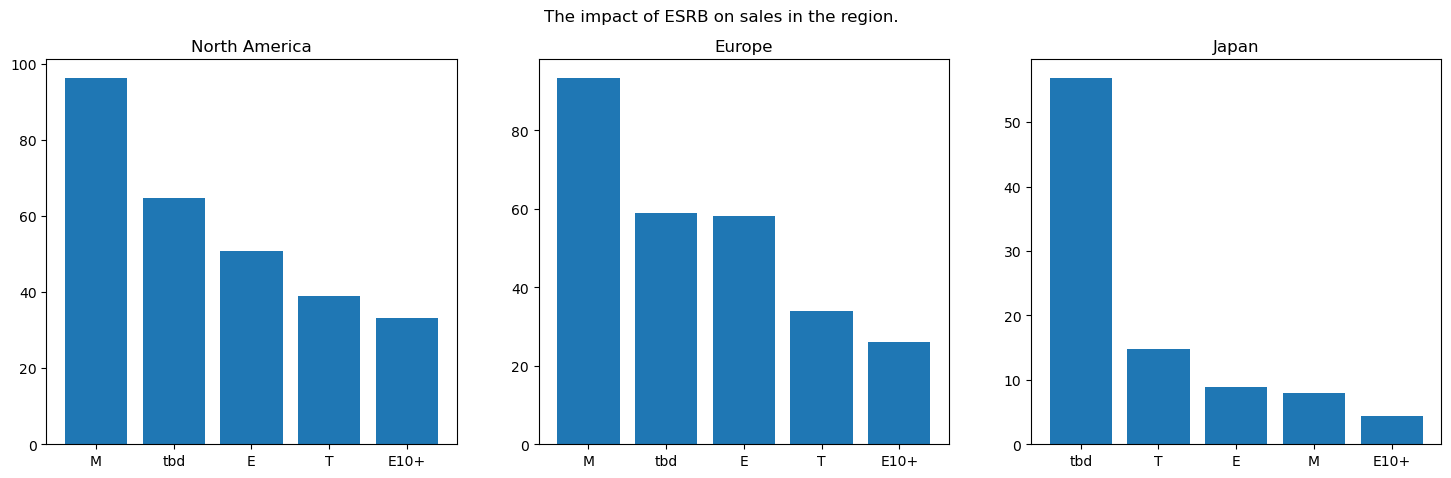

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
na_platforms = (
    actual_data
    .pivot_table(index='rating',
                values='na_sales',
                aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    [:5]
)

eu_platforms = (
    actual_data
    .pivot_table(index='rating',
                values='eu_sales',
                aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    [:5]
)

jp_platforms = (
    actual_data
    .pivot_table(index='rating',
                values='jp_sales',
                aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    [:5]
)

ax1.bar(na_platforms.index, na_platforms['na_sales'])
ax1.set_title('North America')
ax2.bar(eu_platforms.index, eu_platforms['eu_sales'])
ax2.set_title('Europe')
ax3.bar(jp_platforms.index, jp_platforms['jp_sales'])
ax3.set_title('Japan')
fig.suptitle('The impact of ESRB on sales in the region.')
plt.show()

**North American region:**

In the North American region, games with ratings are best sold:
- "M" (for persons over 17 years old)
- "T" (for persons over 13 years old)
- "E" (for all ages)

Also, an "unspecified rating" got into the top 2, which may be due to an incorrect garter rating to the data.

It can be noted that the stricter the rating the game gets, the more users of this region are interested in it.

**European region:**

In the European region, games with ratings are best sold:
- "M" (for persons over 17 years old)
- "E" (for all ages)
- "T" (for persons over 13 years old) 

All the same, an 'unspecified rating' got into the top 2, which may be due to the incorrect garter of the rating to the data.

Just like in the North American region, European users prefer games with a more violent ESRB rating.

**Japanese region:**

Unlike the previous regions, in the Japanese region, the best-selling games have a rating of "tbd", that is, it is not defined. However, it is immediately followed by the same "T", "E" and "M".

This is most likely due to the fact that in the Japanese region, computer games are mainly awarded ratings not by the ESRB, but by the Japanese organization CERO, because a large number of games according to the ESRB rating system have an indefinite rating.

### Hypothesis testing.

#### Hypothesis testing: the average user ratings of the Xbox One and PC platforms are the same.

To test the hypothesis about the equality of the averages of the two general aggregates according to the samples taken from them, we use test_index.

```
H_0: Average user ratings (user_score) of the Xbox One platform = average user
ratings (user_score) of the PC platform`
H_1: Average user ratings (user_score) of the Xbox One platform ≠ average user
ratings (user_score) of the PC platform`
alpha = 0.05
```

In [27]:
results = (
    st
    .ttest_ind(actual_data[actual_data['platform'] == 'XOne']['user_score'],
              actual_data[actual_data['platform'] == 'PC']['user_score'],
              equal_var=False,
              nan_policy='omit')
)

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print('Failed to reject null hypothesis')
    

0.11601398086668943
Failed to reject null hypothesis


#### Hypothesis testing: Average user ratings of Action and Sports genres are different.

To test the hypothesis about the equality of the averages of the two general aggregates according to the samples taken from them, we use test_index.

```
H_0: Average user ratings (user_score) of the genre Action = average user
ratings (user_score) of the PC platform`
H_1: Average user ratings (user_score) of the Xbox One platform ≠ average user
ratings (user_score) of the PC platform`
alpha = 0.05
```

In [28]:
results = (
    st
    .ttest_ind(actual_data[actual_data['genre'] == 'Action']['user_score'],
              actual_data[actual_data['genre'] == 'Sports']['user_score'],
              equal_var=False,
              nan_policy='omit')
)

alpha = .05

print(results.pvalue)

if results.pvalue > alpha:
    print('Reject the null hypothesis')
else:
    print('Failed to reject null hypothesis')

1.182555038264477e-14
Failed to reject null hypothesis


### General conclusion.

- The gaming industry made the first big leap in development in 1995, breaking the mark of 200 games released per year, the industry overcame the mark of more than a thousand games per year already in 2006, and the peak of the release of video games was in 2008-2009. Such rapid growth can be explained by the release of the super-successful sixth-generation PlayStation 2 console in 2000 (more than 150 million consoles were sold).

- On average, the relevance of the platform is about 8 years.

- Consoles of the 7th generation (PS3, X360, 3DS) and PCs have noticeable sharp increases in sales in 2010-2011, this can be explained by the release of cult games such as Call of Duty: Modern Warfare 3, Battlefield 3, The Elder Scrolls V: Skyrim.

- After 2013, with the release of the 8th generation consoles (PS4, XOne), sales on the consoles of the previous generation declined sharply.

- Considering that the data for 2016 is incomplete, the 8th generation consoles show sales growth in 2015.

- The PS4, XOne, 3DS and PC platforms can be identified as potentially profitable, since the PS3 and X360 platforms had almost 0 game sales by 2016, because these consoles are considered obsolete, and the PC platform, although it has always lost to consoles in total video game sales, is the most common platform.

- Critics' ratings have a moderate positive correlation with total sales on the PS4 and XOne platforms (Pearson's correlation coefficient is 0.4 and 0.43, respectively), while user ratings have virtually no effect on total sales (Pearson's correlation coefficient is -0.04 and -0.07, respectively). 

- At the same time, critics' ratings on the PC platform have a much lower positive correlation (Pearson correlation coefficient is 0.17), but user ratings still do not affect total sales (Pearson correlation coefficient -0.07).

- Such a low impact of user ratings is probably due to the fact that marketers of large game development studios have learned to work with "hate raids" from users, an example is the game The Last of Us 2: having a user rating of 3.3 and a critics rating of 95, the game still sold more than 10 million copies and became the best-selling exclusive for PS4.

- The most consistently selling genres are Shooter (median sales of more than 500 thousand copies), Sports (median sales of more than 150 thousand copies), Platform(median sales of more than 125 thousand copies).

- The best-selling genres for the current period are Action, Shooter, Sports and RolePlay, of which Action, Sports and Role-Play have a negative trend of growth in total sales in recent years.

- You should also pay attention to the growing total sales of genres such as Strategy (+75% in 2015) and Adventure (+40% in 2015).

- The rest of the genres have low total and median sales values, the Puzzle genre with the lowest sales among all genres also stands out.

- The most popular platforms in the North American region are PS4, XOne, X360, 3DS and PS3.

- Among the consoles of the 7th generation, European users do not have clear preferences, but among the consoles of the 8th generation, the PS4 clearly wins.

- The undisputed market leaders of the Japanese region are domestic platforms from Sony and Nintendo.

- The most popular genres of the North American region are Shooter, Action, Sports, Role-Playing and Misc.

- The most popular genres of the European region are Action, Shooter, Sports, Role-Playing and Racing.

- The most popular genres of the Japanese region are Role-Playing, Action, Fighting, Misc and Shooter.

- For users of all three regions represented, a characteristic fact is that the tougher the rating of the game, the more likely it is that the user will show interest in it.

- The average user ratings of the Xbox One and PC platforms are the same.

- Average user ratings of Action and Sports genres are not the same.

The following steps were taken during the research:

- The column names are given in lower case.

- Converted to the desired data types.

- Gaps in the table have been processed.

- Total sales in all regions have been calculated and added to a separate column.

- Analyzed changes in sales by platform.

- Potentially profitable platfloms have been calculated.

- A "box with a mustache" has been built for global sales by platform.

- Calculated the best-selling genres for the current period.

- Portraits of users of each region have been compiled.

- Hypotheses have been tested.

In [29]:
data_games = pd.read_csv('datasets/games.csv')

In [30]:
data_games.columns = map(str.lower, data_games.columns)

In [31]:
data_games = data_games.dropna(subset = ['year_of_release', 'name', 'genre'])

In [32]:
data_games['rating'] = data_games['rating'].fillna('unknown')

In [33]:
data_games['total_sales'] = data_games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [34]:
def graph (df, year, region, name, axes):
    
    df = df.query('year_of_release >= @year')
    
    sales = df.pivot_table(index='platform', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'platform': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['platform', 'sales']
      
    labels_c=sales.platform
    colours = {'Wii':'C0', 'NES':'C1', 'GB':'C2', 'DS':'C3', 'X360':'C4', 
    'PS3':'C5', 'PS2':'C6', 'SNES':'C7', 'GBA':'C8',
               'PS4':'steelblue', '3DS':'orange', 
               'N64':'C11', 'PS':'C12', 'XB':'C13', 'PC':'C14', '2600':'C15', 'PSP':'C16', 
               'XOne':'C17',
               'WiiU':'C18', 'GC':'C19', 'GEN':'C20', 'DC':'C21', 'PSV':'C22', 
               'SAT':'C23', 'SCD':'C24', 'WS':'C25', 'NG':'C26', 
               'TG16':'C27', '3DO':'C28', 'GG':'C29', 'PCFX':'C30', 'Other':'darkred'}
   
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               labels= labels_c,
               colors=[colours[key] for key in labels_c],
               legend=False, 
               title = f"The popularity of platforms in {name} ", 
               ax = axes).set(ylabel='')
    
    plt.tight_layout()

/var/folders/4f/f3dd0ncx24gcgzrw3shqgs_00000gn/T/ipykernel_25369/2538443962.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales.append({'platform': 'Other', region: df[region].sum()
/var/folders/4f/f3dd0ncx24gcgzrw3shqgs_00000gn/T/ipykernel_25369/2538443962.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales.append({'platform': 'Other', region: df[region].sum()
/var/folders/4f/f3dd0ncx24gcgzrw3shqgs_00000gn/T/ipykernel_25369/2538443962.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales.append({'platform': 'Other', region: df[region].sum()


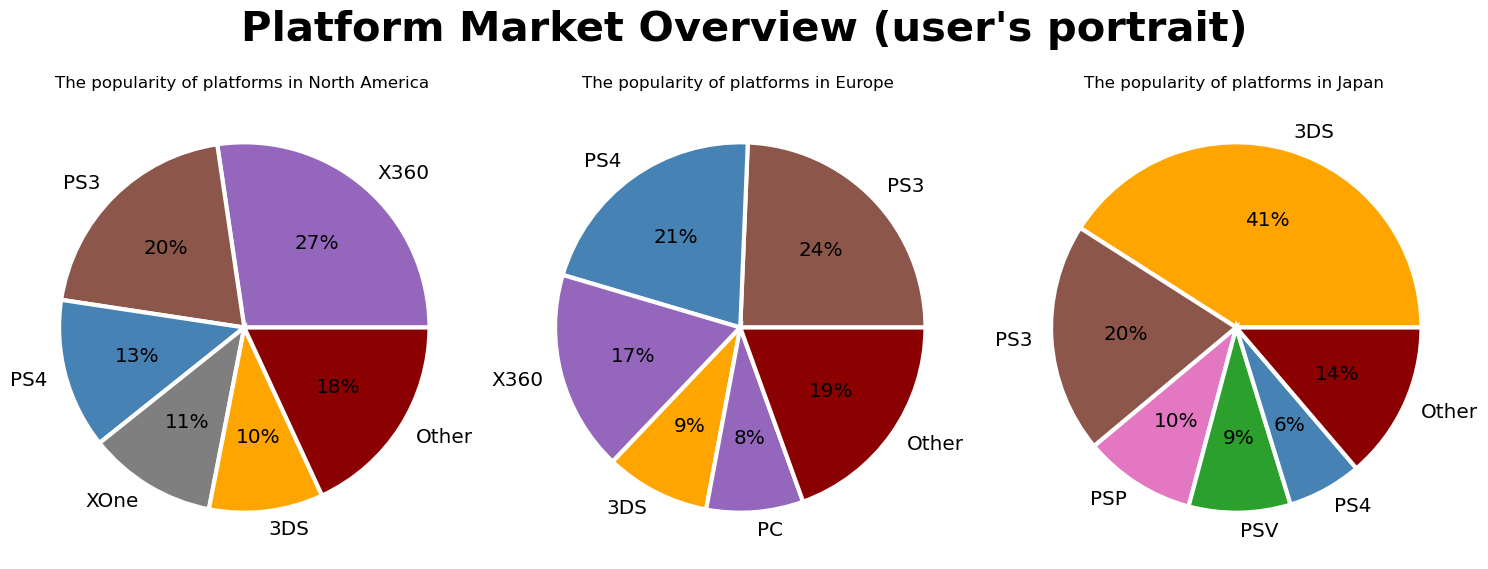

In [35]:
fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Platform Market Overview (user\'s portrait)', fontsize = 30, fontweight='bold')

x_year = 2011

graph(data_games, x_year, 'na_sales', 'North America', axes[0])
graph(data_games, x_year,'eu_sales', 'Europe', axes[1])
graph(data_games, x_year, 'jp_sales', 'Japan', axes[2])

/var/folders/4f/f3dd0ncx24gcgzrw3shqgs_00000gn/T/ipykernel_25369/2538443962.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales.append({'platform': 'Other', region: df[region].sum()
/var/folders/4f/f3dd0ncx24gcgzrw3shqgs_00000gn/T/ipykernel_25369/2538443962.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales.append({'platform': 'Other', region: df[region].sum()
/var/folders/4f/f3dd0ncx24gcgzrw3shqgs_00000gn/T/ipykernel_25369/2538443962.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales.append({'platform': 'Other', region: df[region].sum()


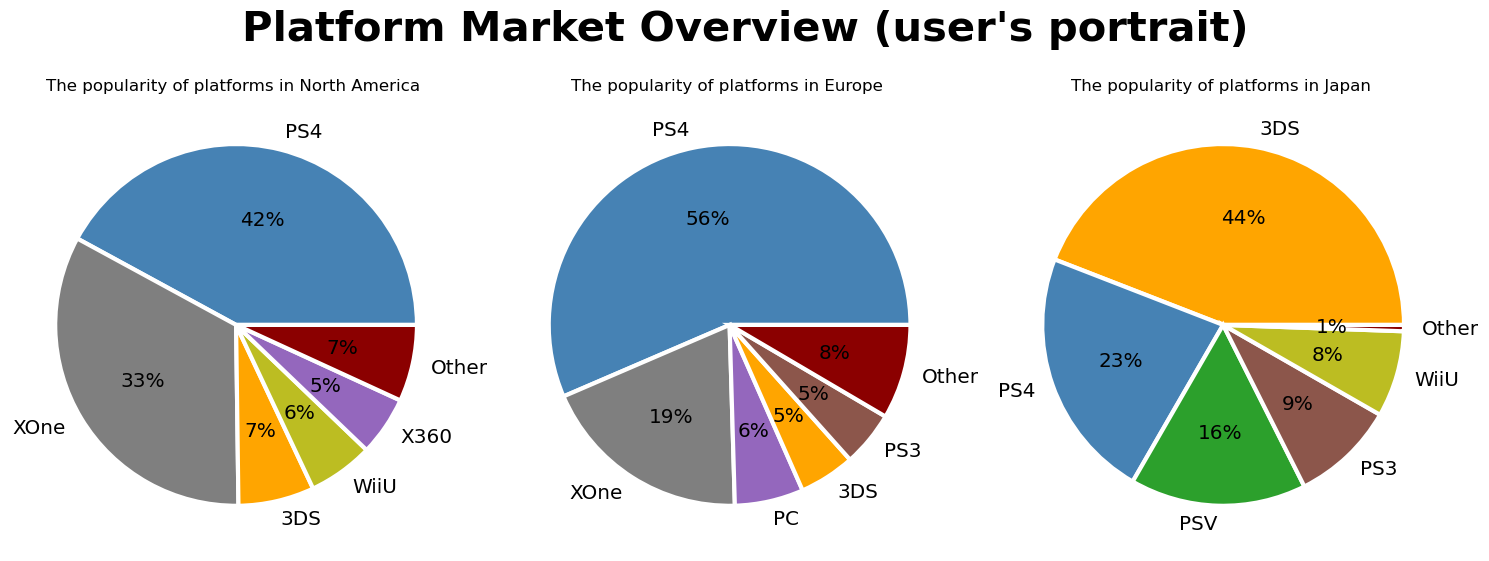

In [36]:
fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Platform Market Overview (user\'s portrait)', fontsize = 30, fontweight='bold')

x_year = 2015

graph(data_games, x_year, 'na_sales', 'North America', axes[0])
graph(data_games, x_year,'eu_sales', 'Europe', axes[1])
graph(data_games, x_year, 'jp_sales', 'Japan', axes[2])